In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [11]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [12]:
prop_df = pd.read_csv("prop_2_count.csv", index_col=0)
prop_df.fillna(0, inplace=True)
prop_df = prop_df.astype(int)
print(len(prop_df))
prop_df.head()

32891


,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,MediaWiki/1.30.0-wmf.*,PBB_core fastrun,PetScan,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,WikidataR - https://github.com/Ironholds/WikidataR,YTCleaner,__find_genus,__match_taxon,awarder,axios,beaTunes,beacon,bot_commons,browser,coords2json,curl,https://github.com/bearloga/WikidataQueryServiceR,images_on_wikidata_not_wikipedia,jgonsior-tree,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),missing_wp_animal_audio,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),okhttp/3.4.1,orcid_bot,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),other,python-requests,query,...,-__total,Apache-HttpClient__total,Apache-Jena-ARQ__total,Asparagus/Asparagus 0.1__total,C++ WikiAPI__total,GuzzleHttp__total,Jakarta Commons-HttpClient/3.1__total,Java/1.7.0__total,Java/1.8.0__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,Magnus labs tools__total,MediaWiki/1.30.0-wmf.*__total,PBB_core fastrun__total,PetScan__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,WikidataR - https://github.com/Ironholds/WikidataR__total,YTCleaner__total,__find_genus__total,__match_taxon__total,awarder__total,axios__total,beaTunes__total,beacon__total,bot_commons__total,browser__total,coords2json__total,curl__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,missing_wp_animal_audio__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,thorough_name_match__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
P698|P698,4853459,4878342,1,4853458,0,1,4878341,0,0,0,0,0,6,0,0,0,0,0,0,1839,4851613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,60,0,0,0,0,0,0,2482,4875799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P279|P31,3244643,13385859,53390,3185556,5697,97424,12591766,696669,173619,1665,2905,0,1,0,53,347,23189,0,1935,0,86,444,10993,171437,105517,30760,0,0,0,0,1,0,22542,0,0,314420,0,331,63,0,0,17042,0,21100,0,0,196322,3905,508041,39,...,755895,52165,116733,0,44,0,1051,1705,611582,0,135270,0,118,2118,46135,303237,239473,34748,0,0,0,0,8,0,111156,0,0,3077733,0,3655,4192,0,0,227896,0,228206,0,0,324008,19628,3255861,97,2329,3833317,104045,0,0,0,0,3
P932|P932,2212168,2218368,11,2212157,0,11,2218357,0,0,0,0,0,5,0,0,0,0,0,0,800,2211352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,602,0,0,0,0,0,0,1035,2216720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P1282|P1282,1176182,1940495,10,1176136,36,12,1940357,126,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,1176162,0,0,0,...,0,0,0,0,623,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,0,0,0,0,0,0,0,0,0,0,1939860,0,0,0,0,0,0,0,0,0,0,0
P17|P625,888474,3230980,10385,877894,195,25783,3201524,3673,22016,4,2350,0,0,0,1973,778520,445,0,80,0,0,6,10,14,0,7,0,0,0,0,0,0,0,0,0,60896,0,0,3,0,0,1,0,0,0,0,0,267,5304,12,...,62447,34,47756,0,0,0,8203,1818522,1185,0,4543,0,0,109,87,105,0,258,0,0,0,0,0,0,0,0,0,631090,0,0,12,0,0,169,0,0,0,0,0,926,614653,14,0,44675,0,0,0,0,0,0


In [13]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total']
cols = list(set(prop_df.columns) - set(vc))
prop_df = prop_df[vc + cols]
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),Magnus labs tools,beaTunes,wd_edit_stats__total,taxon_matcher__total,axios,Jakarta Commons-HttpClient/3.1,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Asparagus/Asparagus 0.1,python-requests__total,PetScan__total,GuzzleHttp__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,-__total,MediaWiki/1.30.0-wmf.*__total,Asparagus/Asparagus 0.1__total,okhttp/3.4.1__total,https://github.com/bearloga/WikidataQueryServiceR,wdq_image_feed,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),orcid_bot__total,Java/1.8.0__total,beacon__total,MediaWiki/1.30.0-wmf.*,update_dynamic,browser,YTCleaner,okhttp/3.4.1,Apache-HttpClient,other,curl__total,rest-client2.0.* (*) ruby/*,Pywikibot/3.0-dev__total,thorough_name_match,Java/1.8.0,WikidataR - https://github.com/Ironholds/WikidataR__total,images_on_wikidata_not_wikipedia,jgonsior-tree__total,missing_wp_animal_audio__total,Ruby__total,C++ WikiAPI__total,...,Java/1.7.0,curl,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),coords2json__total,__match_taxon__total,-,wd_edit_stats,axios__total,QueryBot/0.1,update_dynamic__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,bot_commons,Apache-HttpClient__total,beacon,Java/1.7.0__total,missing_wp_animal_audio,images_on_wikidata_not_wikipedia__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,thorough_name_match__total,taxon_matcher,Apache-Jena-ARQ__total,wdq_image_feed__total,QueryBot/0.1__total,coords2json,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),rest-client2.0.* (*) ruby/*__total,browser__total,PetScan,awarder__total,https://github.com/bearloga/WikidataQueryServiceR__total,bot_commons__total,YTCleaner__total,__find_genus__total,WikidataR - https://github.com/Ironholds/WikidataR,Python-urllib__total,awarder,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Magnus labs tools__total,GuzzleHttp,query__total,Pywikibot/3.0-dev,other__total,Apache-Jena-ARQ,C++ WikiAPI,Python-urllib,"robotic,organic__total",beaTunes__total,Ruby,"robotic,organic",query
P698|P698,4853459,4878342,1,1,4853458,4878341,4851613,4875799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2482,0,0,0,0,0,0,0,0,1839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0
P279|P31,3244643,13385859,53390,97424,3185556,12591766,86,118,1638496,1935,22542,0,104045,0,53,3833317,0,3255861,2118,0,196322,324008,755895,0,0,0,63,1,0,0,611582,0,0,0,314420,0,0,1665,3905,3655,757,303237,0,23189,0,0,0,0,34748,44,...,347,331,17042,0,0,173619,0,0,105517,0,0,0,52165,0,1705,0,0,228206,0,540,116733,3,239473,0,21100,2329,3077733,444,8,4192,0,0,0,0,46135,1,227896,135270,0,97,171437,19628,2905,1,10993,696669,111156,30760,5697,39
P932|P932,2212168,2218368,11,11,2212157,2218357,2211352,2216720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1035,0,0,0,0,0,0,0,0,800,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,602,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
P1282|P1282,1176182,1940495,10,12,1176136,1940357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1176162,1939860,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,623,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,126,0,0,36,0
P17|P625,888474,3230980,10385,25783,877894,3201524,0,0,16764,80,0,0,0,0,1973,44675,0,614653,109,0,0,0,62447,0,0,0,3,0,0,0,1185,0,0,0,60896,0,0,4,267,0,0,105,0,445,0,0,0,0,258,0,...,778520,0,1,0,0,22016,0,0,0,0,0,0,34,0,1818522,0,0,0,0,0,47756,0,0,0,0,0,631090,6,0,12,0,0,0,0,87,0,169,4543,0,14,14,926,2350,0,10,3673,0,7,195,12


In [5]:
query = """
SELECT ?prop ?propLabel WHERE {
?prop wikibase:propertyType ?pt .
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
prop_label_df = wdi_core.WDItemEngine.execute_sparql_query(query, as_dataframe=True)
prop_label_df.prop = prop_label_df.prop.str.replace("http://www.wikidata.org/entity/", "")
prop_label = dict(zip(prop_label_df.prop, prop_label_df.propLabel))
prop_df.to_csv("prop_2_count_labels.csv")

In [14]:
# toss the ones in which its the same two props
print(len(prop_df))
prop_df = prop_df.iloc[prop_df.index.map(lambda x: len(set(x.split("|"))) == 2),:]
print(len(prop_df))

32891
30263


In [15]:
prop_df.index = prop_df.index.map(lambda x: "|".join(map(lambda y:prop_label.get(y,""), x.split("|"))))
prop_df = prop_df.iloc[prop_df.index.notnull(),:]
prop_df.head(5)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper),Magnus labs tools,beaTunes,wd_edit_stats__total,taxon_matcher__total,axios,Jakarta Commons-HttpClient/3.1,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Asparagus/Asparagus 0.1,python-requests__total,PetScan__total,GuzzleHttp__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,-__total,MediaWiki/1.30.0-wmf.*__total,Asparagus/Asparagus 0.1__total,okhttp/3.4.1__total,https://github.com/bearloga/WikidataQueryServiceR,wdq_image_feed,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),orcid_bot__total,Java/1.8.0__total,beacon__total,MediaWiki/1.30.0-wmf.*,update_dynamic,browser,YTCleaner,okhttp/3.4.1,Apache-HttpClient,other,curl__total,rest-client2.0.* (*) ruby/*,Pywikibot/3.0-dev__total,thorough_name_match,Java/1.8.0,WikidataR - https://github.com/Ironholds/WikidataR__total,images_on_wikidata_not_wikipedia,jgonsior-tree__total,missing_wp_animal_audio__total,Ruby__total,C++ WikiAPI__total,...,Java/1.7.0,curl,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),coords2json__total,__match_taxon__total,-,wd_edit_stats,axios__total,QueryBot/0.1,update_dynamic__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,bot_commons,Apache-HttpClient__total,beacon,Java/1.7.0__total,missing_wp_animal_audio,images_on_wikidata_not_wikipedia__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,thorough_name_match__total,taxon_matcher,Apache-Jena-ARQ__total,wdq_image_feed__total,QueryBot/0.1__total,coords2json,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),rest-client2.0.* (*) ruby/*__total,browser__total,PetScan,awarder__total,https://github.com/bearloga/WikidataQueryServiceR__total,bot_commons__total,YTCleaner__total,__find_genus__total,WikidataR - https://github.com/Ironholds/WikidataR,Python-urllib__total,awarder,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Magnus labs tools__total,GuzzleHttp,query__total,Pywikibot/3.0-dev,other__total,Apache-Jena-ARQ,C++ WikiAPI,Python-urllib,"robotic,organic__total",beaTunes__total,Ruby,"robotic,organic",query
subclass of|instance of,3244643,13385859,53390,97424,3185556,12591766,86,118,1638496,1935,22542,0,104045,0,53,3833317,0,3255861,2118,0,196322,324008,755895,0,0,0,63,1,0,0,611582,0,0,0,314420,0,0,1665,3905,3655,757,303237,0,23189,0,0,0,0,34748,44,...,347,331,17042,0,0,173619,0,0,105517,0,0,0,52165,0,1705,0,0,228206,0,540,116733,3,239473,0,21100,2329,3077733,444,8,4192,0,0,0,0,46135,1,227896,135270,0,97,171437,19628,2905,1,10993,696669,111156,30760,5697,39
country|coordinate location,888474,3230980,10385,25783,877894,3201524,0,0,16764,80,0,0,0,0,1973,44675,0,614653,109,0,0,0,62447,0,0,0,3,0,0,0,1185,0,0,0,60896,0,0,4,267,0,0,105,0,445,0,0,0,0,258,0,...,778520,0,1,0,0,22016,0,0,0,0,0,0,34,0,1818522,0,0,0,0,0,47756,0,0,0,0,0,631090,6,0,12,0,0,0,0,87,0,169,4543,0,14,14,926,2350,0,10,3673,0,7,195,12
located in the administrative territorial entity|coordinate location,804925,2096781,15369,157930,789392,1934872,0,0,475,1804,0,1,0,0,986,2721,0,166,418,0,0,0,2384,0,0,0,2,0,0,0,10,0,0,0,18388,0,0,0,4,54,0,130,0,8,10582,0,0,0,224,0,...,778520,6,1645,172,0,364,1,0,0,0,0,0,0,0,1818522,0,0,0,0,0,4,0,0,27,0,0,184603,13,0,32,0,0,0,942,5192,0,15143,56639,0,21,11,15,4,0,1820,3979,0,6,164,6
"dissolved, abolished or demolished|end time",790044,6690122,1159,1906,788871,6686557,0,0,0,27,0,0,0,0,0,0,0,6638644,90,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1173,0,0,0,0,0,0,27382,0,1,0,0,0,0,0,0,...,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,3565,1,0,0,0,0,0,0,0,0,20759,1420,0,0,6664,0,9,0,0,1659,0,0,14,0
image|instance of,788845,2338764,12305,74574,776416,2168619,0,0,15467,366,0,23,0,0,0,109223,0,435,626,0,0,0,1297743,0,0,141,2,1,0,0,682,0,0,1,86473,0,84,0,200,17,0,228,0,498,0,122257,0,0,48252,440,...,0,3,2670,0,0,517627,1,0,0,336,0,0,0,0

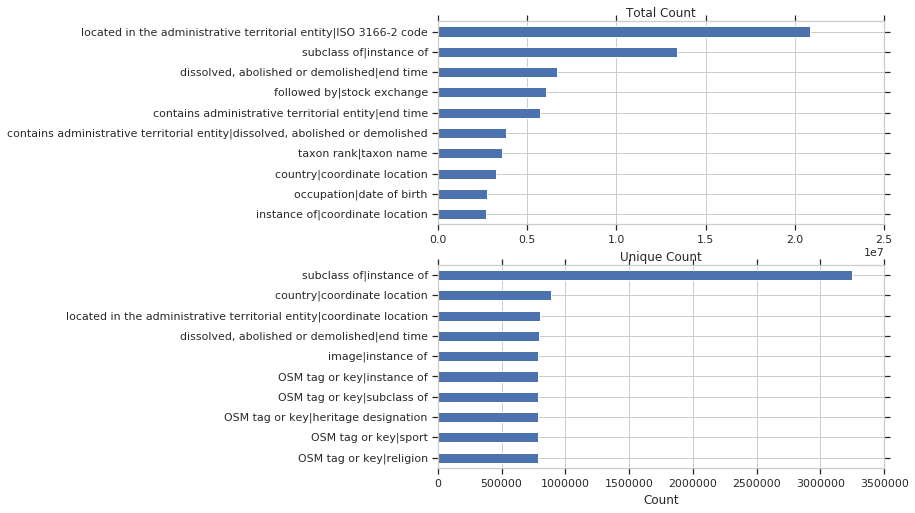

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = prop_df.sort_values("total")[-10:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("unique")[-10:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")
ax2.set_xlabel("Count")

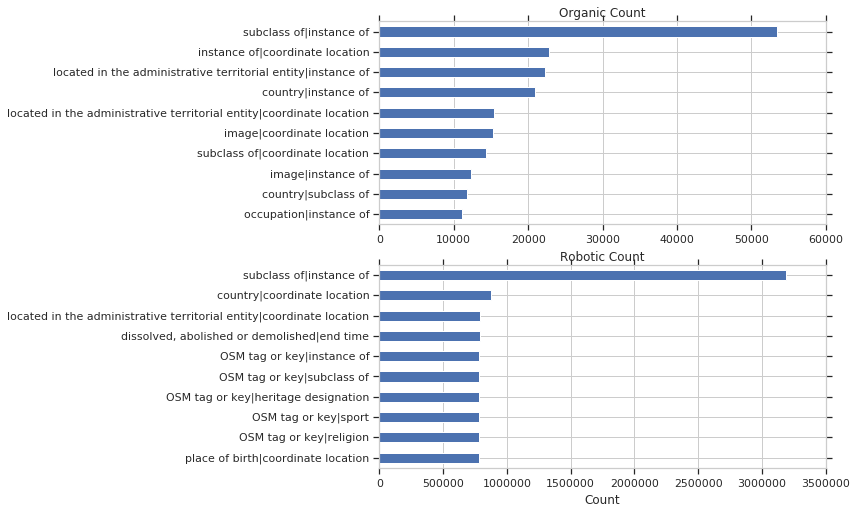

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
df = prop_df.sort_values("organic")[-10:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("robotic")[-10:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")
ax2.set_xlabel("Count")

In [64]:
!zcat data/2017-678_uniq.tsv.gz| parallel --pipe --block 10M "python3 unquote.py | grep -P '<http://www.wikidata.org/[^>]*?P699>' | grep -P '<http://www.wikidata.org/[^>]*?P279>'"

SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  <http://www.wikidata.org/entity/Q5432932>  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  <http://www.wikidata.org/entity/Q5432932>  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	 SERVICE  <http://wikiba.se/ontology#label>   {	    <http://www.bigdata.com/rdf#serviceParam>  <http://wikiba.se/ontology#language>  "en".	  }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  ?var3  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	 SERVICE  <http://wikiba.se/ontology#label>   {	    <http://www.bigdata.com/rdf#serviceParam>  <http://wikiba.se/ontology#language>  "en".	  }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/direct/P279>  ?var3 .	 }	}		ro

SELECT DISTINCT ?var1  ?var1Label  ?var2  ?var3  ?var4 	WHERE {	  VALUES (  ?var5  ) {	   (  "true"^^<http://www.w3.org/2001/XMLSchema#boolean>  )	   (  "false"^^<http://www.w3.org/2001/XMLSchema#boolean>  )	  }	  BIND (  IF (  ?var5 , ?var4 , ?var6  )  AS  ?var1 ).	  BIND (  IF (  ?var5 , ?var4Label , ?var6Label  )  AS  ?var1Label ).	  BIND (  IF (  ?var5 , "FFA500", "7FFF00" )  AS  ?var2 ).	  BIND (  IF (  ?var5 , "", ?var4  )  AS  ?var3 ).	  ?var4  <http://www.wikidata.org/prop/direct/P699>  ?var7 .	  ?var4  <http://www.wikidata.org/prop/direct/P279> + <http://www.wikidata.org/entity/Q18123741> .	  ?var4  <http://www.wikidata.org/prop/direct/P2176>  ?var6 .	  ?var6  <http://www.w3.org/2000/01/rdf-schema#label>  ?var6Label .	  ?var4  <http://www.w3.org/2000/01/rdf-schema#label>  ?var4Label .	 FILTER (  ( (  LANG (  ?var6Label  )  =  "en" ) ) 	) .	 FILTER (  ( (  LANG (  ?var4Label  )  =  "en" ) ) 	) .	  ?var4  <http://www.wikidata.org/prop/direct/P31>  <http://www.wikidata.org/entity

In [65]:
!zcat data/2017-678_uniq.tsv.gz| parallel --pipe --block 10M "python3 unquote.py | grep -P '<http://www.wikidata.org/[^>]*?P699>' | grep -P '<http://www.wikidata.org/[^>]*?P486>'"

SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P486>  ?var4 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P486>  ?var4 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/P486>  ?var4 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  BIND (  LANG (  ?va